In [1]:
#Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', 500)

In [2]:
#Loading Previous Application Data  for our Analysis in Python using PANDAS
inp_2 = pd.read_csv("previous_application.csv")

In [3]:
#Dropping uncessary/less important columns from Prev application data set
inp_2.drop(['SK_ID_PREV','AMT_DOWN_PAYMENT','AMT_GOODS_PRICE','WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START','FLAG_LAST_APPL_PER_CONTRACT','NFLAG_LAST_APPL_IN_DAY','RATE_DOWN_PAYMENT','RATE_INTEREST_PRIMARY','RATE_INTEREST_PRIVILEGED','NAME_CASH_LOAN_PURPOSE','NAME_PORTFOLIO'] ,axis=1,inplace=True)

In [4]:
#Dropping uncessary/less important columns from Prev application data set
inp_2.drop(['DAYS_DECISION','NAME_PAYMENT_TYPE','CODE_REJECT_REASON','NAME_TYPE_SUITE','NAME_CLIENT_TYPE','NAME_GOODS_CATEGORY','NAME_PRODUCT_TYPE','CHANNEL_TYPE','SELLERPLACE_AREA','NAME_SELLER_INDUSTRY','CNT_PAYMENT','NAME_YIELD_GROUP','PRODUCT_COMBINATION','DAYS_FIRST_DRAWING','DAYS_FIRST_DUE','DAYS_LAST_DUE_1ST_VERSION','DAYS_LAST_DUE','DAYS_TERMINATION','NFLAG_INSURED_ON_APPROVAL'] ,axis=1,inplace=True)

### DATA CLEANING for previous application data set

In [5]:
#Checking the data types for each column of Data set inp_2  i.e previous_application 

inp_2.dtypes

SK_ID_CURR                int64
NAME_CONTRACT_TYPE       object
AMT_ANNUITY             float64
AMT_APPLICATION         float64
AMT_CREDIT              float64
NAME_CONTRACT_STATUS     object
dtype: object

In [6]:
#To check if there are any missing /null values present in our selected data set inp_2
inp_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 6 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   SK_ID_CURR            1048575 non-null  int64  
 1   NAME_CONTRACT_TYPE    1048575 non-null  object 
 2   AMT_ANNUITY           815566 non-null   float64
 3   AMT_APPLICATION       1048575 non-null  float64
 4   AMT_CREDIT            1048575 non-null  float64
 5   NAME_CONTRACT_STATUS  1048575 non-null  object 
dtypes: float64(3), int64(1), object(2)
memory usage: 48.0+ MB


In [7]:
# To check for Null value  in Column
# Observation: AMT_ANNUITY is having Null values
inp_2.isnull().sum()

SK_ID_CURR                   0
NAME_CONTRACT_TYPE           0
AMT_ANNUITY             233009
AMT_APPLICATION              0
AMT_CREDIT                   0
NAME_CONTRACT_STATUS         0
dtype: int64

In [8]:
#To check size of Data set in terms of rows and column
inp_2.shape

(1048575, 6)

In [9]:
# To check the % of missing value AMT_ANNUITY 
float(100*372235/1670214)

22.286665062081866

In [10]:
# To check the Count/occurence of each type of value in the column
inp_2["AMT_ANNUITY"].value_counts()

2250.000     20068
11250.000     8771
6750.000      8454
9000.000      7785
22500.000     7347
             ...  
23713.335        1
9677.070         1
2715.120         1
5314.095         1
5087.835         1
Name: AMT_ANNUITY, Length: 282291, dtype: int64

In [11]:
# To find the Description of AMT_ANNUITY column.
inp_2["AMT_ANNUITY"].describe()

count    815566.000000
mean      15891.265151
std       14745.557438
min           0.000000
25%        6301.350000
50%       11250.000000
75%       20523.003750
max      418058.145000
Name: AMT_ANNUITY, dtype: float64

In [12]:
# For Numerical variable, we fill Null values with the Mean of values.
# Imputing the mean value since the mean and std deviation is not varying a lot,so it felt right to impute the Null value with mean value
inp_2["AMT_ANNUITY"] = inp_2["AMT_ANNUITY"].fillna((inp_2["AMT_ANNUITY"].mean()))


In [13]:
#To check the Distribution of values in the Column- AMT_CREDIT & for any possibility of Outliers
inp_2["AMT_CREDIT"].describe()

count    1.048575e+06
mean     1.950000e+05
std      3.169407e+05
min      0.000000e+00
25%      2.427750e+04
50%      8.025300e+04
75%      2.152395e+05
max      6.905160e+06
Name: AMT_CREDIT, dtype: float64

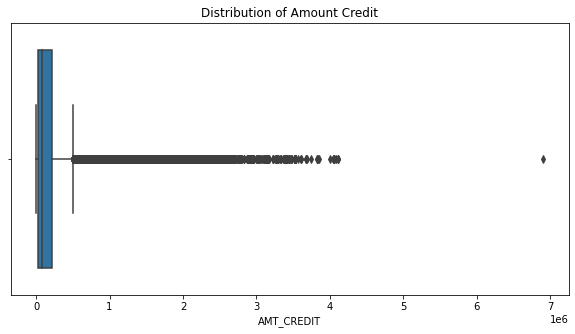

In [14]:
## By usimg BOX PLOT we observe , that there are lot of continuous values, so they wont be 
# considered as an Outlier except the Max value at the right corner of graph
plt.figure(figsize=(10,5))
plt.title('Distribution of Amount Credit')
sns.boxplot(inp_2.AMT_CREDIT)
plt.show()

In [15]:
# Observation: we get 0 Null values present in our Previous application data set
inp_2.isnull().sum()

SK_ID_CURR              0
NAME_CONTRACT_TYPE      0
AMT_ANNUITY             0
AMT_APPLICATION         0
AMT_CREDIT              0
NAME_CONTRACT_STATUS    0
dtype: int64

In [16]:
inp_2.head()
# To check first 5 rows of data set

,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,NAME_CONTRACT_STATUS
0,271877,Consumer loans,1730.430,17145.0,17145.0,Approved
1,108129,Cash loans,25188.615,607500.0,679671.0,Approved
2,122040,Cash loans,15060.735,112500.0,136444.5,Approved
3,176158,Cash loans,47041.335,450000.0,470790.0,Approved
4,202054,Cash loans,31924.395,337500.0,404055.0,Refused


### DATA CLEANING for application data set

In [17]:
#Loading the Application data CSV file to python using PANDAS
inp_1 = pd.read_csv("application_data.csv")

In [18]:
inp_1.shape
# To Count the  no of rows and column data imported

(307511, 122)

In [19]:
inp_1.head()
# To display first 5 rows in data set

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [20]:
# To Drop the Non-useful columns from data set and analysing only Important columns wrt to the problem statement
inp_1=inp_1[['SK_ID_CURR','TARGET','NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','DAYS_BIRTH','OCCUPATION_TYPE','CNT_FAM_MEMBERS','ORGANIZATION_TYPE']]

In [21]:
inp_1.head()
# We observe that only few columns are now part of our Application data frame inp_1

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,ORGANIZATION_TYPE
0,100002,1,Cash loans,M,N,Y,202500.0,406597.5,24700.5,Working,Secondary / secondary special,Single / not married,House / apartment,-9461,Laborers,1.0,Business Entity Type 3
1,100003,0,Cash loans,F,N,N,270000.0,1293502.5,35698.5,State servant,Higher education,Married,House / apartment,-16765,Core staff,2.0,School
2,100004,0,Revolving loans,M,Y,Y,67500.0,135000.0,6750.0,Working,Secondary / secondary special,Single / not married,House / apartment,-19046,Laborers,1.0,Government
3,100006,0,Cash loans,F,N,Y,135000.0,312682.5,29686.5,Working,Secondary / secondary special,Civil marriage,House / apartment,-19005,Laborers,2.0,Business Entity Type 3
4,100007,0,Cash loans,M,N,Y,121500.0,513000.0,21865.5,Working,Secondary / secondary special,Single / not married,House / apartment,-19932,Core staff,1.0,Religion


In [22]:
inp_1.shape
# To check the Rows and column imported.

(307511, 17)

In [23]:
inp_1.dtypes
# Checking the Data types of each column in application data frame

SK_ID_CURR               int64
TARGET                   int64
NAME_CONTRACT_TYPE      object
CODE_GENDER             object
FLAG_OWN_CAR            object
FLAG_OWN_REALTY         object
AMT_INCOME_TOTAL       float64
AMT_CREDIT             float64
AMT_ANNUITY            float64
NAME_INCOME_TYPE        object
NAME_EDUCATION_TYPE     object
NAME_FAMILY_STATUS      object
NAME_HOUSING_TYPE       object
DAYS_BIRTH               int64
OCCUPATION_TYPE         object
CNT_FAM_MEMBERS        float64
ORGANIZATION_TYPE       object
dtype: object

In [24]:
inp_1.isnull().sum()
# To check for Missing values present in data set

SK_ID_CURR                 0
TARGET                     0
NAME_CONTRACT_TYPE         0
CODE_GENDER                0
FLAG_OWN_CAR               0
FLAG_OWN_REALTY            0
AMT_INCOME_TOTAL           0
AMT_CREDIT                 0
AMT_ANNUITY               12
NAME_INCOME_TYPE           0
NAME_EDUCATION_TYPE        0
NAME_FAMILY_STATUS         0
NAME_HOUSING_TYPE          0
DAYS_BIRTH                 0
OCCUPATION_TYPE        96391
CNT_FAM_MEMBERS            2
ORGANIZATION_TYPE          0
dtype: int64

In [25]:
# To check % of missing records for Column OCCUPATION_TYPE
# Observation: Null value is almost 30% , so reaplcing the Null value with Unknown.

float(96391*100/307511)


31.345545362604916

In [26]:
# Replacing Missing  values with Unknown 

inp_1.OCCUPATION_TYPE.fillna('Unknown',inplace=True)

In [27]:
inp_1.OCCUPATION_TYPE.value_counts()

Unknown                  96391
Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

In [28]:
inp_1.OCCUPATION_TYPE.isnull().sum()
# Now, we dont have any null value inside the column

0

In [29]:
inp_1.isnull().sum()
# Now, we are left with AMT_ANNUITY and CNT_FM_MEMEBERs column having NULL values

SK_ID_CURR              0
TARGET                  0
NAME_CONTRACT_TYPE      0
CODE_GENDER             0
FLAG_OWN_CAR            0
FLAG_OWN_REALTY         0
AMT_INCOME_TOTAL        0
AMT_CREDIT              0
AMT_ANNUITY            12
NAME_INCOME_TYPE        0
NAME_EDUCATION_TYPE     0
NAME_FAMILY_STATUS      0
NAME_HOUSING_TYPE       0
DAYS_BIRTH              0
OCCUPATION_TYPE         0
CNT_FAM_MEMBERS         2
ORGANIZATION_TYPE       0
dtype: int64

In [30]:
#CNT_FAM_MEMBERS with count 2 as NULL can be removed- as it wont have an impact on Analysis
inp_1=inp_1[~inp_1.CNT_FAM_MEMBERS.isnull()]

In [31]:
#AMT_ANNUITY  with count 12 as NULL can be removed- as it wont have an impact on Analysis
inp_1=inp_1[~inp_1.AMT_ANNUITY.isnull()]

In [32]:
inp_1.isnull().sum()
# Now, we observe- there's no Missing value in Application data set as its been handled.

SK_ID_CURR             0
TARGET                 0
NAME_CONTRACT_TYPE     0
CODE_GENDER            0
FLAG_OWN_CAR           0
FLAG_OWN_REALTY        0
AMT_INCOME_TOTAL       0
AMT_CREDIT             0
AMT_ANNUITY            0
NAME_INCOME_TYPE       0
NAME_EDUCATION_TYPE    0
NAME_FAMILY_STATUS     0
NAME_HOUSING_TYPE      0
DAYS_BIRTH             0
OCCUPATION_TYPE        0
CNT_FAM_MEMBERS        0
ORGANIZATION_TYPE      0
dtype: int64

In [33]:
# Joining the two dataframes using the foreign key "SK_ID_CURR"
# Using LEFT OUTER JOIN on Appplication data frame and Previous Application data frame, we get the Application data long with Historical data if exist of any Customer.

# Here-inp_1 is Application data set and inp_2 is Previous Application data set
# Here- inp_0 is the merged data set

inp_0 = inp_1.merge(inp_2,on="SK_ID_CURR", how="left")

In [34]:
inp_0.shape
# Checking the shape i.e row and column count after joining two data frames.

(932465, 22)

In [35]:
inp_0.info()
# To check the Different data types of each column along with its missing/Null value if any


<class 'pandas.core.frame.DataFrame'>
Int64Index: 932465 entries, 0 to 932464
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   SK_ID_CURR            932465 non-null  int64  
 1   TARGET                932465 non-null  int64  
 2   NAME_CONTRACT_TYPE_x  932465 non-null  object 
 3   CODE_GENDER           932465 non-null  object 
 4   FLAG_OWN_CAR          932465 non-null  object 
 5   FLAG_OWN_REALTY       932465 non-null  object 
 6   AMT_INCOME_TOTAL      932465 non-null  float64
 7   AMT_CREDIT_x          932465 non-null  float64
 8   AMT_ANNUITY_x         932465 non-null  float64
 9   NAME_INCOME_TYPE      932465 non-null  object 
 10  NAME_EDUCATION_TYPE   932465 non-null  object 
 11  NAME_FAMILY_STATUS    932465 non-null  object 
 12  NAME_HOUSING_TYPE     932465 non-null  object 
 13  DAYS_BIRTH            932465 non-null  int64  
 14  OCCUPATION_TYPE       932465 non-null  object 
 15  

In [36]:
# Renaming  the Columns for better readibility

inp_0.rename(columns={'NAME_CONTRACT_TYPE_x':'NAME_CONTRACT_TYPE','AMT_CREDIT_x':'AMT_CREDIT','AMT_ANNUITY_x':'AMT_ANNUITY','NAME_CONTRACT_TYPE_y':'PREV_NAME_CONTRACT_TYPE','AMT_ANNUITY_y':'PREV_AMT_ANNUITY','AMT_CREDIT_y':'PREV_AMT_CREDIT'},inplace=True)

In [37]:
inp_0.dtypes
# To check data types and Updated column names  in data set

SK_ID_CURR                   int64
TARGET                       int64
NAME_CONTRACT_TYPE          object
CODE_GENDER                 object
FLAG_OWN_CAR                object
FLAG_OWN_REALTY             object
AMT_INCOME_TOTAL           float64
AMT_CREDIT                 float64
AMT_ANNUITY                float64
NAME_INCOME_TYPE            object
NAME_EDUCATION_TYPE         object
NAME_FAMILY_STATUS          object
NAME_HOUSING_TYPE           object
DAYS_BIRTH                   int64
OCCUPATION_TYPE             object
CNT_FAM_MEMBERS            float64
ORGANIZATION_TYPE           object
PREV_NAME_CONTRACT_TYPE     object
PREV_AMT_ANNUITY           float64
AMT_APPLICATION            float64
PREV_AMT_CREDIT            float64
NAME_CONTRACT_STATUS        object
dtype: object

In [38]:
inp_0.isnull().sum()
# To check for Null values in data set inp_0 i.e consolidated data frame
# OBSERATION: Here, now null values in the result indicates the number of new Customers 
# who applied for Loan & dont have any Historical data present.



SK_ID_CURR                     0
TARGET                         0
NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
FLAG_OWN_CAR                   0
FLAG_OWN_REALTY                0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
AMT_ANNUITY                    0
NAME_INCOME_TYPE               0
NAME_EDUCATION_TYPE            0
NAME_FAMILY_STATUS             0
NAME_HOUSING_TYPE              0
DAYS_BIRTH                     0
OCCUPATION_TYPE                0
CNT_FAM_MEMBERS                0
ORGANIZATION_TYPE              0
PREV_NAME_CONTRACT_TYPE    45178
PREV_AMT_ANNUITY           45178
AMT_APPLICATION            45178
PREV_AMT_CREDIT            45178
NAME_CONTRACT_STATUS       45178
dtype: int64

In [39]:
inp_0.shape

(932465, 22)

In [40]:
inp_0.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,ORGANIZATION_TYPE,PREV_NAME_CONTRACT_TYPE,PREV_AMT_ANNUITY,AMT_APPLICATION,PREV_AMT_CREDIT,NAME_CONTRACT_STATUS
0,100002,1,Cash loans,M,N,Y,202500.0,406597.5,24700.5,Working,Secondary / secondary special,Single / not married,House / apartment,-9461,Laborers,1.0,Business Entity Type 3,Consumer loans,9251.775,179055.0,179055.0,Approved
1,100003,0,Cash loans,F,N,N,270000.0,1293502.5,35698.5,State servant,Higher education,Married,House / apartment,-16765,Core staff,2.0,School,Cash loans,98356.995,900000.0,1035882.0,Approved
2,100003,0,Cash loans,F,N,N,270000.0,1293502.5,35698.5,State servant,Higher education,Married,House / apartment,-16765,Core staff,2.0,School,Consumer loans,64567.665,337500.0,348637.5,Approved
3,100004,0,Revolving loans,M,Y,Y,67500.0,135000.0,6750.0,Working,Secondary / secondary special,Single / not married,House / apartment,-19046,Laborers,1.0,Government,Consumer loans,5357.250,24282.0,20106.0,Approved
4,100006,0,Cash loans,F,N,Y,135000.0,312682.5,29686.5,Working,Secondary / secondary special,Civil marriage,House / apartment,-19005,Laborers,2.0,Business Entity Type 3,Cash loans,24246.000,675000.0,675000.0,Approved


In [41]:
# Adding new Column Customer_AGE to convert days into years and as an Integer
inp_0['CUSTOMER_AGE']=inp_0.DAYS_BIRTH*(-0.00273973)
inp_0.CUSTOMER_AGE=inp_0.CUSTOMER_AGE.astype('int')

In [42]:
# Dropping the DAYS_BIRTH Column as now we can check Customer AGE with new column: CUSTOMER_AGE
inp_0.drop(labels="DAYS_BIRTH", inplace=True, axis=1)


In [43]:
inp_0.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,CNT_FAM_MEMBERS,ORGANIZATION_TYPE,PREV_NAME_CONTRACT_TYPE,PREV_AMT_ANNUITY,AMT_APPLICATION,PREV_AMT_CREDIT,NAME_CONTRACT_STATUS,CUSTOMER_AGE
0,100002,1,Cash loans,M,N,Y,202500.0,406597.5,24700.5,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,1.0,Business Entity Type 3,Consumer loans,9251.775,179055.0,179055.0,Approved,25
1,100003,0,Cash loans,F,N,N,270000.0,1293502.5,35698.5,State servant,Higher education,Married,House / apartment,Core staff,2.0,School,Cash loans,98356.995,900000.0,1035882.0,Approved,45
2,100003,0,Cash loans,F,N,N,270000.0,1293502.5,35698.5,State servant,Higher education,Married,House / apartment,Core staff,2.0,School,Consumer loans,64567.665,337500.0,348637.5,Approved,45
3,100004,0,Revolving loans,M,Y,Y,67500.0,135000.0,6750.0,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,1.0,Government,Consumer loans,5357.250,24282.0,20106.0,Approved,52
4,100006,0,Cash loans,F,N,Y,135000.0,312682.5,29686.5,Working,Secondary / secondary special,Civil marriage,House / apartment,Laborers,2.0,Business Entity Type 3,Cash loans,24246.000,675000.0,675000.0,Approved,52


In [44]:
inp_0.isnull().sum()
# Onservation:  There are few columns having Missing values which need to be treated as below.

SK_ID_CURR                     0
TARGET                         0
NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
FLAG_OWN_CAR                   0
FLAG_OWN_REALTY                0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
AMT_ANNUITY                    0
NAME_INCOME_TYPE               0
NAME_EDUCATION_TYPE            0
NAME_FAMILY_STATUS             0
NAME_HOUSING_TYPE              0
OCCUPATION_TYPE                0
CNT_FAM_MEMBERS                0
ORGANIZATION_TYPE              0
PREV_NAME_CONTRACT_TYPE    45178
PREV_AMT_ANNUITY           45178
AMT_APPLICATION            45178
PREV_AMT_CREDIT            45178
NAME_CONTRACT_STATUS       45178
CUSTOMER_AGE                   0
dtype: int64

In [45]:
#Missing value handling for Categorical variable.
inp_0["PREV_NAME_CONTRACT_TYPE"] = inp_0["PREV_NAME_CONTRACT_TYPE"].fillna("Not Applicable")
# Not Applicable for new customer means with no previous history

In [46]:
#Missing value handling for Numerical variable.
inp_0["PREV_AMT_ANNUITY"] = inp_0["PREV_AMT_ANNUITY"].fillna(0)
# 0 for new customer with no previous history

In [47]:
#Missing value handling for Numerical variable.
inp_0["AMT_APPLICATION"] = inp_0["AMT_APPLICATION"].fillna(0)
# 0 for new customer with no previous history

In [48]:
#Missing value handling for Numerical variable
inp_0["PREV_AMT_CREDIT"] = inp_0["PREV_AMT_CREDIT"].fillna(0)
# 0 for new customer with no previous history

In [49]:
#Missing value handling for Categorical variable.
inp_0["NAME_CONTRACT_STATUS"] = inp_0["NAME_CONTRACT_STATUS"].fillna('Not Applicable')
# Not Applicable for new customer wuth no history

In [50]:
inp_0.CODE_GENDER.value_counts(normalize=True)
# Observation: there are very less % of XNA  entries , so  dropping those rows.

F      0.673501
M      0.326459
XNA    0.000040
Name: CODE_GENDER, dtype: float64

In [51]:
inp_0=inp_0[inp_0.CODE_GENDER !='XNA']
# Considering only value for Male and Female Gender

In [52]:
inp_0.isnull().sum()
# All missing value have now been handled in the data set

SK_ID_CURR                 0
TARGET                     0
NAME_CONTRACT_TYPE         0
CODE_GENDER                0
FLAG_OWN_CAR               0
FLAG_OWN_REALTY            0
AMT_INCOME_TOTAL           0
AMT_CREDIT                 0
AMT_ANNUITY                0
NAME_INCOME_TYPE           0
NAME_EDUCATION_TYPE        0
NAME_FAMILY_STATUS         0
NAME_HOUSING_TYPE          0
OCCUPATION_TYPE            0
CNT_FAM_MEMBERS            0
ORGANIZATION_TYPE          0
PREV_NAME_CONTRACT_TYPE    0
PREV_AMT_ANNUITY           0
AMT_APPLICATION            0
PREV_AMT_CREDIT            0
NAME_CONTRACT_STATUS       0
CUSTOMER_AGE               0
dtype: int64

### FINDING OUTLIERS in Dataset inp_0

In [53]:

# Converting monetary values in to nearest Ten thousand
inp_0["AMT_INCOME_TOTAL"] = inp_0["AMT_INCOME_TOTAL"].floordiv(10000)
inp_0["AMT_CREDIT"] = inp_0["AMT_CREDIT"].floordiv(10000)
inp_0["AMT_ANNUITY"] = inp_0["AMT_ANNUITY"].floordiv(10000)
inp_0["PREV_AMT_ANNUITY"] = inp_0["PREV_AMT_ANNUITY"].floordiv(10000)
inp_0["AMT_APPLICATION"] = inp_0["AMT_APPLICATION"].floordiv(10000)
inp_0["PREV_AMT_CREDIT"] = inp_0["PREV_AMT_CREDIT"].floordiv(10000)



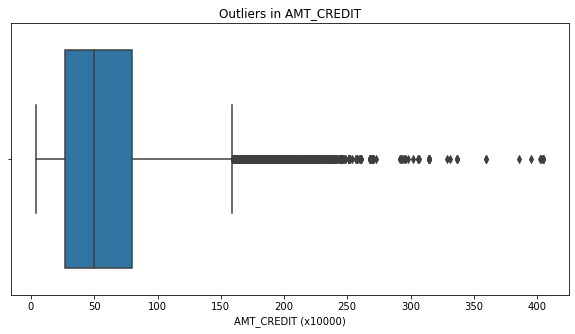

In [54]:
# Finding Outlier in AMT_CREDIT column: BOX PLOT
plt.figure(figsize=(10,5))
sns.boxplot(inp_0.AMT_CREDIT)
plt.title('Outliers in AMT_CREDIT')
plt.xlabel('AMT_CREDIT (x10000)')
plt.show()
# Observation: Continuous values that lie outside the whiskers are not outlier.
# Except for value beyond 4000000 which can be treated as an outlier.

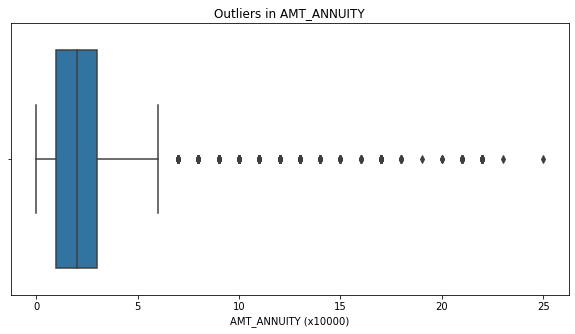

In [55]:
# Finding Outlier in AMT_ANNUITY column: BOX PLOT
plt.figure(figsize=(10,5))
sns.boxplot(inp_0.AMT_ANNUITY)
plt.title('Outliers in AMT_ANNUITY')
plt.xlabel('AMT_ANNUITY (x10000)')
plt.show()
# Observation: Continuous values that lie outside the whiskers are not outlier.
# Except for value near 250000 which can be treated as an outlier.

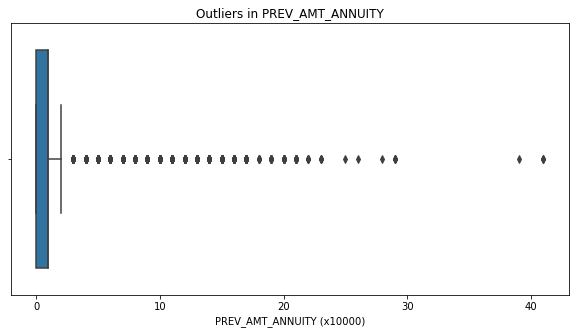

In [56]:
# Finding Outlier in PREV_AMT_ANNUITY column: BOX PLOT
plt.figure(figsize=(10,5))
sns.boxplot(inp_0.PREV_AMT_ANNUITY)
plt.title('Outliers in PREV_AMT_ANNUITY')
plt.xlabel('PREV_AMT_ANNUITY (x10000)')
plt.show()
# For Previous Hisotrical data, we observe that there are a few outliers near 400000 for PREV_AMT_ANNUITY value

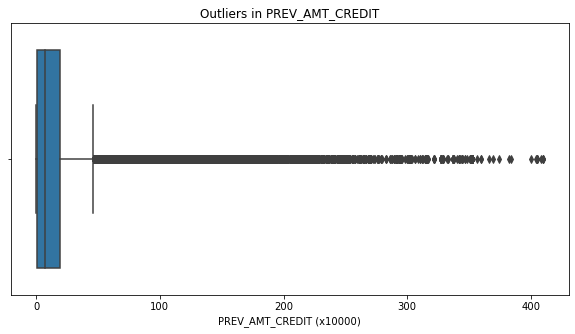

In [57]:
# Finding Outlier in PREV_AMT_CREDIT column: BOX PLOT
plt.figure(figsize=(10,5))
sns.boxplot(inp_0.PREV_AMT_CREDIT)
plt.title('Outliers in PREV_AMT_CREDIT')
plt.xlabel('PREV_AMT_CREDIT (x10000)')
plt.show()
# Observation: There are continuos set of values , so they all cannot be treated as Outlier.

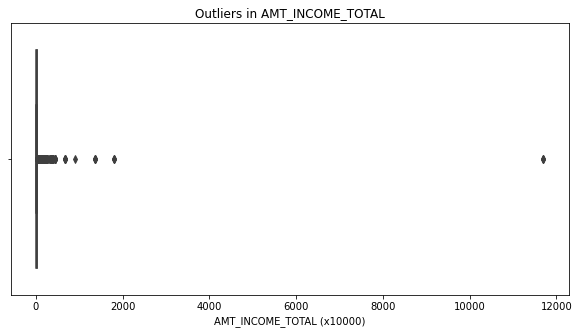

In [58]:
# Finding Outlier in AMT_INCOME_TOTAL column: BOX PLOT
plt.figure(figsize=(10,5))
sns.boxplot(inp_0.AMT_INCOME_TOTAL)
plt.title('Outliers in AMT_INCOME_TOTAL')
plt.xlabel('AMT_INCOME_TOTAL (x10000)')
plt.show()
# Observation: There are continuous set of values , so they all cannot be treated as Outlier.
# There's is a Outlier present after a huge gap from the continuous distribution near 12000(X10000)


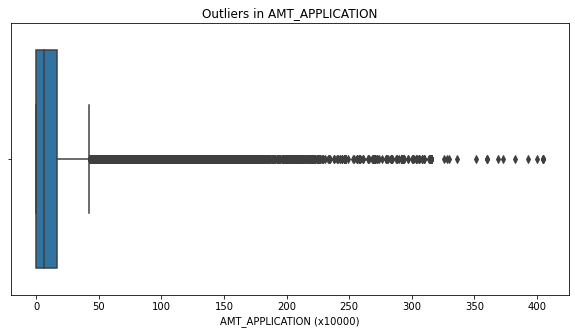

In [59]:
# Finding Outlier in AMT_APPLICATION column: BOX PLOT
plt.figure(figsize=(10,5))
sns.boxplot(inp_0.AMT_APPLICATION)
plt.title('Outliers in AMT_APPLICATION')
plt.xlabel('AMT_APPLICATION (x10000)')
plt.show()
# Observation: There are continuous set of values , so they all cannot be treated as Outlier.


In [60]:
inp_0.dtypes

SK_ID_CURR                   int64
TARGET                       int64
NAME_CONTRACT_TYPE          object
CODE_GENDER                 object
FLAG_OWN_CAR                object
FLAG_OWN_REALTY             object
AMT_INCOME_TOTAL           float64
AMT_CREDIT                 float64
AMT_ANNUITY                float64
NAME_INCOME_TYPE            object
NAME_EDUCATION_TYPE         object
NAME_FAMILY_STATUS          object
NAME_HOUSING_TYPE           object
OCCUPATION_TYPE             object
CNT_FAM_MEMBERS            float64
ORGANIZATION_TYPE           object
PREV_NAME_CONTRACT_TYPE     object
PREV_AMT_ANNUITY           float64
AMT_APPLICATION            float64
PREV_AMT_CREDIT            float64
NAME_CONTRACT_STATUS        object
CUSTOMER_AGE                 int32
dtype: object

### Univariate Analysis - Categorical

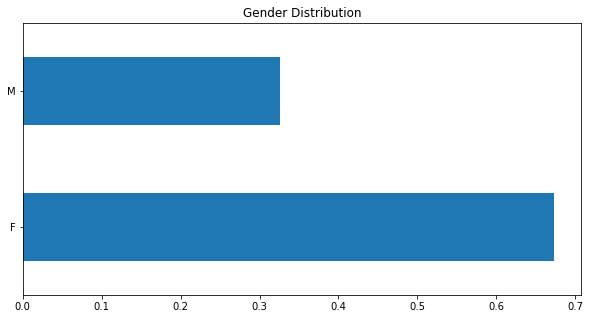

In [61]:
plt.figure(figsize=(10,5))
inp_0.CODE_GENDER.value_counts(normalize=True).plot.barh()
plt.title('Gender Distribution')
plt.show()

# Observation: More than 60% of the Total applicants are Females.

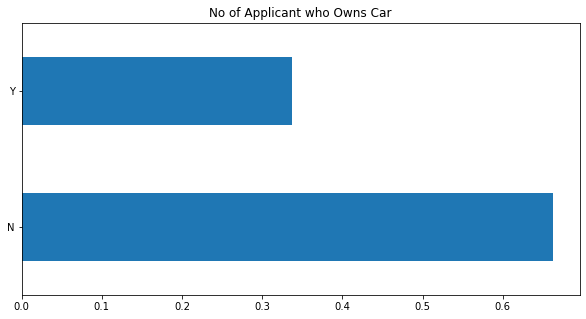

In [62]:
plt.figure(figsize=(10,5))
inp_0.FLAG_OWN_CAR.value_counts(normalize=True).plot.barh()
plt.title('No of Applicant who Owns Car')
plt.show()
# Observation: More than 60% of the Loan applicants don't have a Car 

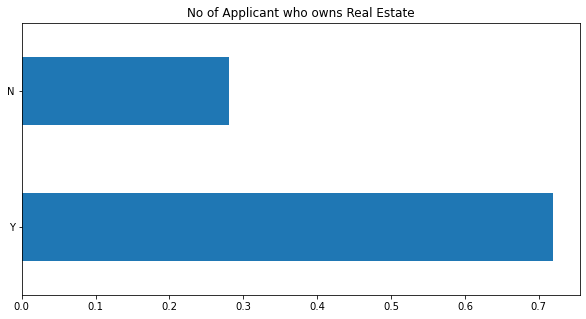

In [63]:
plt.figure(figsize=(10,5))
plt.title('No of Applicant who owns Real Estate')
inp_0.FLAG_OWN_REALTY.value_counts(normalize=True).plot.barh()
plt.show()
# Observation: More than 70% of the Loan applicants own a House.

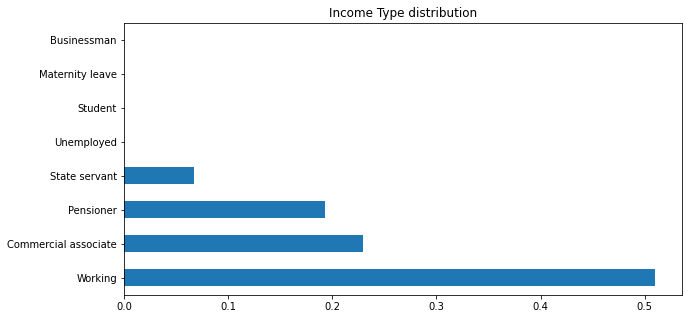

In [64]:
plt.figure(figsize=(10,5))
plt.title('Income Type distribution')
inp_0.NAME_INCOME_TYPE.value_counts(normalize=True).plot.barh()
plt.show()
# Observation: Applicant having Income type- Working  have taken maximum no of loan,
# while applicants with Income type as Students, Unemployed, Maternity leave 
# and Businessman have taken the least no of loans.



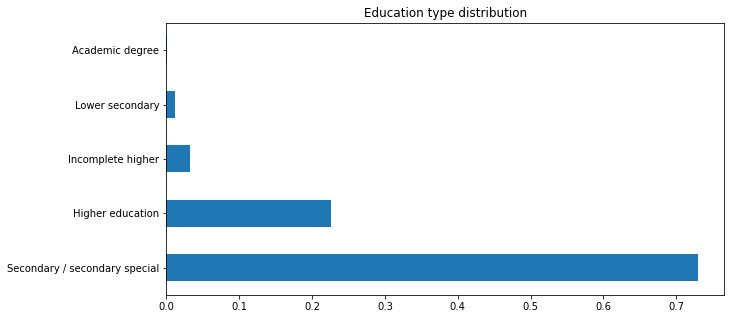

In [65]:
plt.figure(figsize=(10,5))
plt.title('Education type distribution')
inp_0.NAME_EDUCATION_TYPE.value_counts(normalize=True).plot.barh()
plt.show()
# Observation: Education does play an important role for Loan applicants.
# Most educated people with Education type Secondary/secondary special have shown more interest
# in taking Loan based on the no of applications received.
# Applicants  with Highest qualification as Academic degree have taken least no of loans.

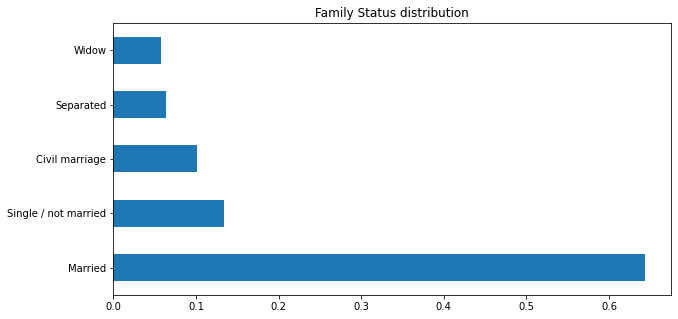

In [66]:
plt.figure(figsize=(10,5))
plt.title('Family Status distribution')
inp_0.NAME_FAMILY_STATUS.value_counts(normalize=True).plot.barh()
plt.show()
# Observation: Among all applicants, married ones are highest in numbers 
# whereas Widowers and Separated are the least.

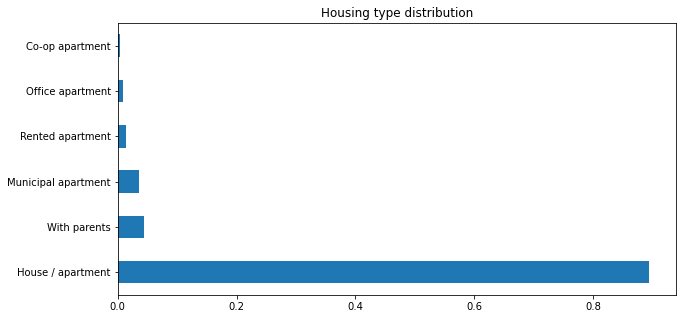

In [67]:
plt.figure(figsize=(10,5))
plt.title('Housing type distribution')
inp_0.NAME_HOUSING_TYPE.value_counts(normalize=True).plot.barh()
plt.show()
# Most loan applicants  were people living in Housing/apartments type while least  no of 
#applicants were residing in  Co-op apartments and Office apartments.

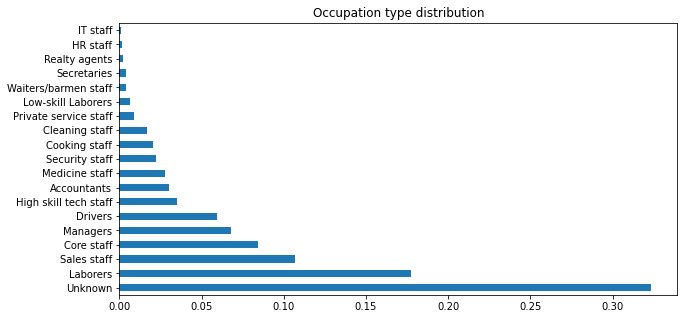

In [68]:
plt.figure(figsize=(10,5))
plt.title('Occupation type distribution')

inp_0.OCCUPATION_TYPE.value_counts(normalize=True).plot.barh()
plt.show()

# Labourers and Sales Staff have been the most common occupation in Loan takers from Known categories

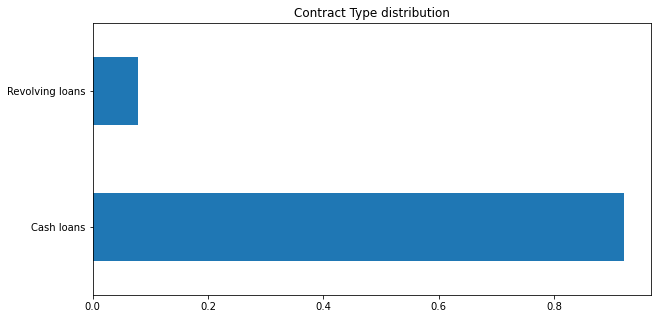

In [69]:
plt.figure(figsize=(10,5))
plt.title('Contract Type distribution')

inp_0.NAME_CONTRACT_TYPE.value_counts(normalize=True).plot.barh()
plt.show()
# Observation-We can Observe that  almost 90% of Current Applicant would like to make CASH Loan Contract.

In [70]:
inp_0.ORGANIZATION_TYPE.value_counts()

# Observation: Business Entity Type 3 people are most among all the applicants.

Business Entity Type 3    201926
XNA                       179717
Self-employed             119558
Other                      48602
Medicine                   34156
Business Entity Type 2     30775
Government                 30149
School                     25793
Trade: type 7              24467
Kindergarten               20586
Construction               19634
Business Entity Type 1     17014
Transport: type 4          16157
Security                   10227
Industry: type 3            9896
Industry: type 9            9720
Trade: type 3               9449
Housing                     9062
Industry: type 11           8023
Military                    7669
Trade: type 2               7472
Bank                        7318
Agriculture                 7120
Police                      6835
Postal                      6538
Transport: type 2           6086
Security Ministries         5623
Restaurant                  5425
Services                    4667
Industry: type 7            3968
University

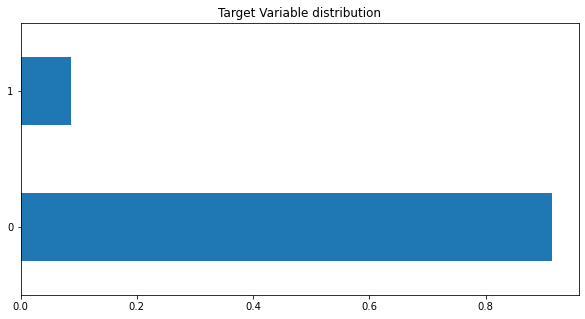

In [71]:
plt.figure(figsize=(10,5))
plt.title('Target Variable distribution')
inp_0.TARGET.value_counts(normalize=True).plot.barh()
plt.show()

# Observation:  Around 90% of Loan Takers have not Defaulted i.e Target varibale=0
# while the remaining Around 10% of the Loan takers are Default i.e. Target Varibale=1

In [72]:
#Converting AGE  into Ordered catgeorical variables in data set
#We create a new COLUMN  'AGE_GROUP' as below and bin them

#Age group:  <30, 30-40, 40-50,50-60 and 60+.
    
inp_0['AGE_GROUP']=pd.cut(inp_0['CUSTOMER_AGE'],[0,30,40,50,60,99999],labels=['<30','30-40','40-50','50-60','60+'])  

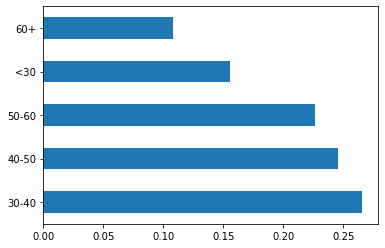

In [73]:
inp_0.AGE_GROUP.value_counts(normalize=True).plot.barh()
plt.show()


# Observation: Max no if applicants are in Age groip 30-40 , while Elderly people in Age group of 60+ are the least.


In [74]:
inp_0.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,CNT_FAM_MEMBERS,ORGANIZATION_TYPE,PREV_NAME_CONTRACT_TYPE,PREV_AMT_ANNUITY,AMT_APPLICATION,PREV_AMT_CREDIT,NAME_CONTRACT_STATUS,CUSTOMER_AGE,AGE_GROUP
0,100002,1,Cash loans,M,N,Y,20.0,40.0,2.0,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,1.0,Business Entity Type 3,Consumer loans,0.0,17.0,17.0,Approved,25,<30
1,100003,0,Cash loans,F,N,N,27.0,129.0,3.0,State servant,Higher education,Married,House / apartment,Core staff,2.0,School,Cash loans,9.0,90.0,103.0,Approved,45,40-50
2,100003,0,Cash loans,F,N,N,27.0,129.0,3.0,State servant,Higher education,Married,House / apartment,Core staff,2.0,School,Consumer loans,6.0,33.0,34.0,Approved,45,40-50
3,100004,0,Revolving loans,M,Y,Y,6.0,13.0,0.0,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,1.0,Government,Consumer loans,0.0,2.0,2.0,Approved,52,50-60
4,100006,0,Cash loans,F,N,Y,13.0,31.0,2.0,Working,Secondary / secondary special,Civil marriage,House / apartment,Laborers,2.0,Business Entity Type 3,Cash loans,2.0,67.0,67.0,Approved,52,50-60


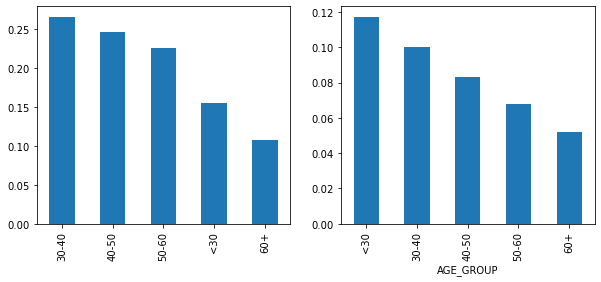

In [75]:
## BIVARIATE....

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
inp_0.AGE_GROUP.value_counts(normalize=True).plot.bar()
plt.subplot(1,2,2)
inp_0.groupby(['AGE_GROUP'])['TARGET'].mean().plot.bar()
plt.show()

# Plot 1 - Applicants in AGE GROUP 30-40 are highest seeker of loan whereas 60+ are the least seakers  

# Plot 2 - Applicant within 30 years of age tends to default the most among the whole applicants.



In [76]:
# Dropping The  CUSTOMER AGE COLUMN since there is a AGE_GROUP colums available
inp_0.drop(labels="CUSTOMER_AGE", inplace=True, axis=1)

In [77]:
inp_0.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,CNT_FAM_MEMBERS,ORGANIZATION_TYPE,PREV_NAME_CONTRACT_TYPE,PREV_AMT_ANNUITY,AMT_APPLICATION,PREV_AMT_CREDIT,NAME_CONTRACT_STATUS,AGE_GROUP
0,100002,1,Cash loans,M,N,Y,20.0,40.0,2.0,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,1.0,Business Entity Type 3,Consumer loans,0.0,17.0,17.0,Approved,<30
1,100003,0,Cash loans,F,N,N,27.0,129.0,3.0,State servant,Higher education,Married,House / apartment,Core staff,2.0,School,Cash loans,9.0,90.0,103.0,Approved,40-50
2,100003,0,Cash loans,F,N,N,27.0,129.0,3.0,State servant,Higher education,Married,House / apartment,Core staff,2.0,School,Consumer loans,6.0,33.0,34.0,Approved,40-50
3,100004,0,Revolving loans,M,Y,Y,6.0,13.0,0.0,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,1.0,Government,Consumer loans,0.0,2.0,2.0,Approved,50-60
4,100006,0,Cash loans,F,N,Y,13.0,31.0,2.0,Working,Secondary / secondary special,Civil marriage,House / apartment,Laborers,2.0,Business Entity Type 3,Cash loans,2.0,67.0,67.0,Approved,50-60


In [78]:
# Segmenting dataframe based off TARGET variable
# yd - defaulter, 
# nd - non defaulter

yd = inp_0[inp_0['TARGET'] == 1]
nd = inp_0[inp_0['TARGET'] == 0]

In [79]:
nd.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,CNT_FAM_MEMBERS,ORGANIZATION_TYPE,PREV_NAME_CONTRACT_TYPE,PREV_AMT_ANNUITY,AMT_APPLICATION,PREV_AMT_CREDIT,NAME_CONTRACT_STATUS,AGE_GROUP
1,100003,0,Cash loans,F,N,N,27.0,129.0,3.0,State servant,Higher education,Married,House / apartment,Core staff,2.0,School,Cash loans,9.0,90.0,103.0,Approved,40-50
2,100003,0,Cash loans,F,N,N,27.0,129.0,3.0,State servant,Higher education,Married,House / apartment,Core staff,2.0,School,Consumer loans,6.0,33.0,34.0,Approved,40-50
3,100004,0,Revolving loans,M,Y,Y,6.0,13.0,0.0,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,1.0,Government,Consumer loans,0.0,2.0,2.0,Approved,50-60
4,100006,0,Cash loans,F,N,Y,13.0,31.0,2.0,Working,Secondary / secondary special,Civil marriage,House / apartment,Laborers,2.0,Business Entity Type 3,Cash loans,2.0,67.0,67.0,Approved,50-60
5,100006,0,Cash loans,F,N,Y,13.0,31.0,2.0,Working,Secondary / secondary special,Civil marriage,House / apartment,Laborers,2.0,Business Entity Type 3,Revolving loans,1.0,0.0,0.0,Canceled,50-60


In [80]:
yd.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,CNT_FAM_MEMBERS,ORGANIZATION_TYPE,PREV_NAME_CONTRACT_TYPE,PREV_AMT_ANNUITY,AMT_APPLICATION,PREV_AMT_CREDIT,NAME_CONTRACT_STATUS,AGE_GROUP
0,100002,1,Cash loans,M,N,Y,20.0,40.0,2.0,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,1.0,Business Entity Type 3,Consumer loans,0.0,17.0,17.0,Approved,<30
69,100031,1,Cash loans,F,N,Y,11.0,97.0,2.0,Working,Secondary / secondary special,Widow,House / apartment,Cooking staff,1.0,Business Entity Type 3,Not Applicable,0.0,0.0,0.0,Not Applicable,50-60
114,100047,1,Cash loans,M,N,Y,20.0,119.0,3.0,Commercial associate,Secondary / secondary special,Married,House / apartment,Laborers,2.0,Business Entity Type 3,Revolving loans,2.0,0.0,45.0,Approved,40-50
115,100047,1,Cash loans,M,N,Y,20.0,119.0,3.0,Commercial associate,Secondary / secondary special,Married,House / apartment,Laborers,2.0,Business Entity Type 3,Cash loans,1.0,15.0,15.0,Approved,40-50
116,100047,1,Cash loans,M,N,Y,20.0,119.0,3.0,Commercial associate,Secondary / secondary special,Married,House / apartment,Laborers,2.0,Business Entity Type 3,Cash loans,3.0,67.0,74.0,Refused,40-50


In [81]:
nd.shape

(852237, 22)

In [82]:
yd.shape

(80191, 22)

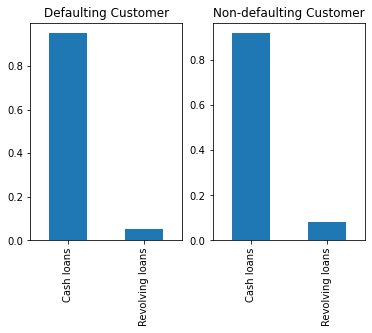

In [83]:
plt.subplot(1,2,1)
yd.NAME_CONTRACT_TYPE.value_counts(normalize=True).plot.bar()
plt.title('Defaulting Customer')
plt.subplot(1,2,2)
nd.NAME_CONTRACT_TYPE.value_counts(normalize=True).plot.bar()
plt.title('Non-defaulting Customer')
plt.show()

# Cash loans are preferred among the two Contract types regardless of defaulter or non-defaulter

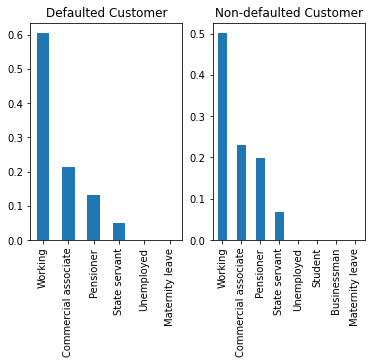

In [84]:
plt.subplot(1,2,1)
yd.NAME_INCOME_TYPE.value_counts(normalize=True).plot.bar()
plt.title('Defaulted Customer')
plt.subplot(1,2,2)
nd.NAME_INCOME_TYPE.value_counts(normalize=True).plot.bar()
plt.title('Non-defaulted Customer')
plt.show()

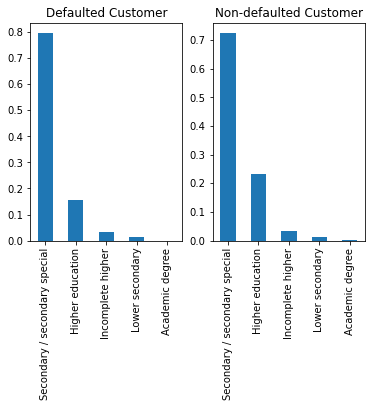

In [85]:

plt.subplot(1,2,1)
yd.NAME_EDUCATION_TYPE.value_counts(normalize=True).plot.bar()
plt.title('Defaulted Customer')
plt.subplot(1,2,2)
nd.NAME_EDUCATION_TYPE.value_counts(normalize=True).plot.bar()
plt.title('Non-defaulted Customer')
plt.show()

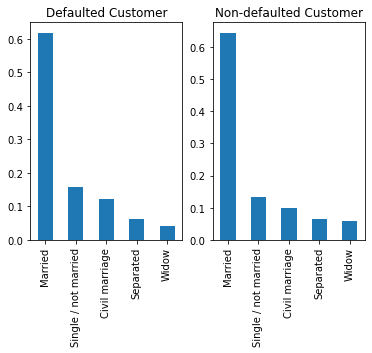

In [86]:


plt.subplot(1,2,1)
yd.NAME_FAMILY_STATUS.value_counts(normalize=True).plot.bar()
plt.title('Defaulted Customer')
plt.subplot(1,2,2)
nd.NAME_FAMILY_STATUS.value_counts(normalize=True).plot.bar()
plt.title('Non-defaulted Customer')
plt.show()

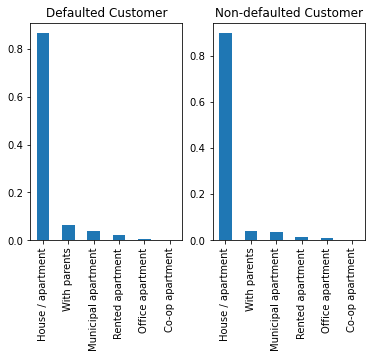

In [87]:


plt.subplot(1,2,1)
yd.NAME_HOUSING_TYPE.value_counts(normalize=True).plot.bar()
plt.title('Defaulted Customer')
plt.subplot(1,2,2)
nd.NAME_HOUSING_TYPE.value_counts(normalize=True).plot.bar()
plt.title('Non-defaulted Customer')
plt.show()

### Univariate analysis: Categorical variable

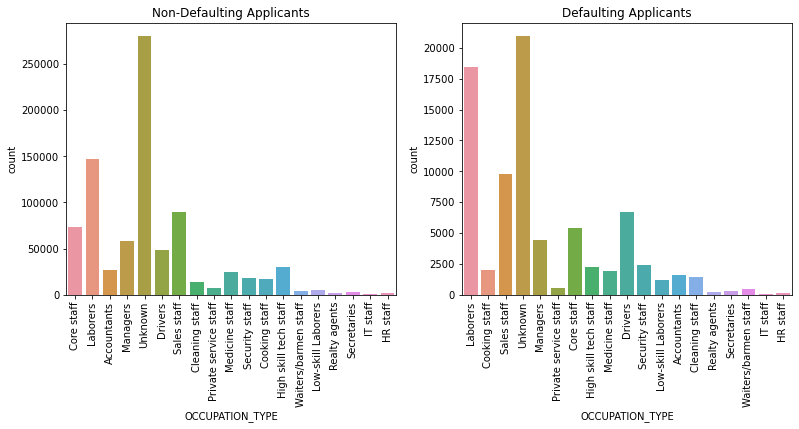

In [88]:
plt.figure(figsize=(13,5))
plt.subplot(1,2,1)
sns.countplot(x='OCCUPATION_TYPE', data = nd)
plt.title('Non-Defaulting Applicants')
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.countplot(x='OCCUPATION_TYPE', data = yd)
plt.title('Defaulting Applicants')
plt.xticks(rotation=90)

plt.show()

**`Inferences below.`**

- Inference 1: Laborers tends to default the most followed by Sales Staffs and Drivers amongst the known Occupation type.
- HR Staff and IT Staff are the least seeker of loans regardless of their Target type

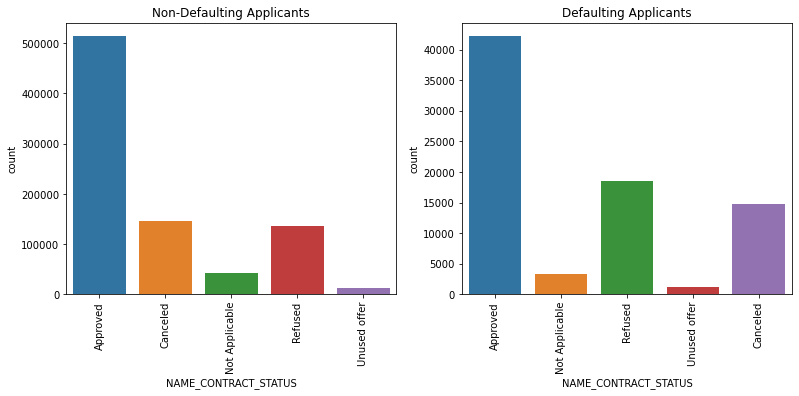

In [89]:
plt.figure(figsize=(13,5))
plt.subplot(1,2,1)
sns.countplot(x='NAME_CONTRACT_STATUS', data = nd)
plt.title('Non-Defaulting Applicants')
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.countplot(x='NAME_CONTRACT_STATUS', data = yd)
plt.title('Defaulting Applicants')
plt.xticks(rotation=90)

plt.show()

**`Inferences below.`**

- Inference 1: In the case of Non-Defaulters, Cancelled applications are more than Refused ones.
- Inference 2: In the case of Non-Defaulters, Refused applications are more than Cancelled ones.

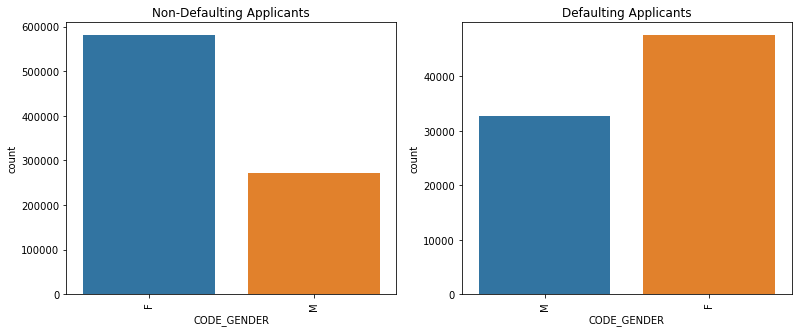

In [90]:

plt.figure(figsize=(13,5))
plt.subplot(1,2,1)
sns.countplot(x='CODE_GENDER', data = nd)
plt.title('Non-Defaulting Applicants')
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.countplot(x='CODE_GENDER', data = yd)
plt.title('Defaulting Applicants')
plt.xticks(rotation=90)

plt.show()

**`Inferences below.`**

- Inference 1: Females are more likely to apply for loan regardless of being a deafaulter or a non-defaulter.

## Bivariate analysis
## Continuous vs Continuous variable

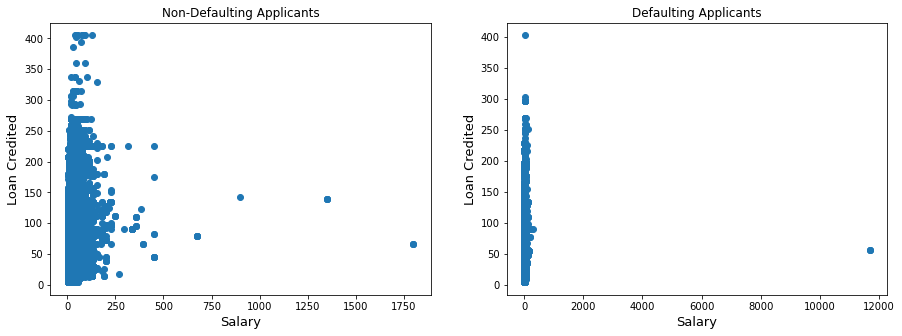

In [91]:
# AMT_INCOME_TOTAL vs AMT_CREDIT

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.scatter((nd['AMT_INCOME_TOTAL']), nd['AMT_CREDIT'])
plt.xlabel("Salary", fontdict = {'fontsize' : 13, 'fontweight': 10})
plt.ylabel("Loan Credited", fontdict = {'fontsize' : 13, 'fontweight': 10})
plt.title('Non-Defaulting Applicants')

plt.subplot(1,2,2)
plt.scatter((yd['AMT_INCOME_TOTAL']), yd['AMT_CREDIT'])
plt.xlabel("Salary", fontdict = {'fontsize' : 13, 'fontweight': 10})
plt.ylabel("Loan Credited", fontdict = {'fontsize' : 13, 'fontweight': 10})
plt.title('Defaulting Applicants')

plt.show()

# No clear pattern found

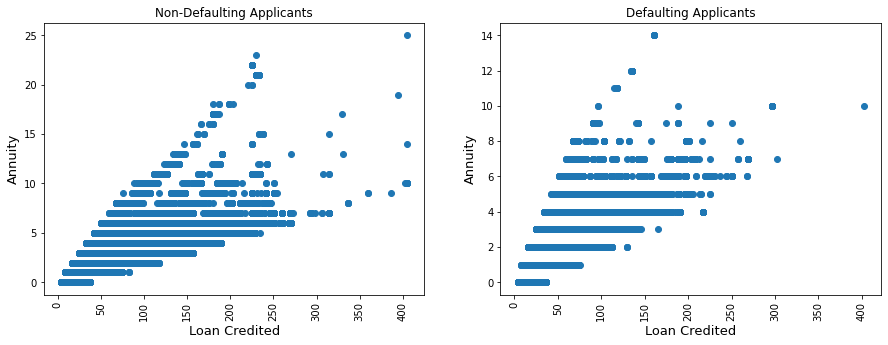

In [92]:
# AMT_CREDIT vs AMT_ANNUITY
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.scatter((nd['AMT_CREDIT']), nd['AMT_ANNUITY'])
plt.xlabel("Loan Credited", fontdict = {'fontsize' : 13, 'fontweight': 10})
plt.ylabel("Annuity", fontdict = {'fontsize' : 13, 'fontweight': 10})
plt.title('Non-Defaulting Applicants')
plt.xticks(rotation=90)

plt.subplot(1,2,2)
plt.scatter((yd['AMT_CREDIT']), yd['AMT_ANNUITY'])
plt.xlabel("Loan Credited", fontdict = {'fontsize' : 13, 'fontweight': 10})
plt.ylabel("Annuity", fontdict = {'fontsize' : 13, 'fontweight': 10})
plt.title('Defaulting Applicants')
plt.xticks(rotation=90)


plt.show()

**`Inferences below.`**

- Inference 1: Defaulters tend to stick to the lower annuity amount when compared to non-defaulters.
- Inference 2: The plot shows that Annuity vs Loan Credited for defaulters has a sharper incline when compared to non-defaulters.

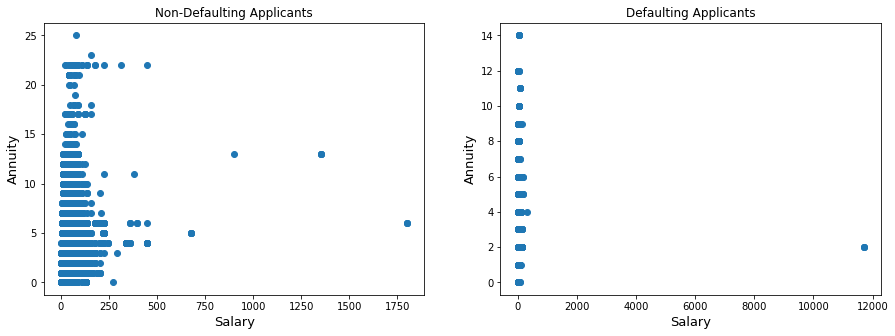

In [93]:
# AMT_INCOME_TOTAL vs AMT_ANNUITY
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.scatter((nd['AMT_INCOME_TOTAL']), nd['AMT_ANNUITY'])
plt.xlabel("Salary", fontdict = {'fontsize' : 13, 'fontweight': 10})
plt.ylabel("Annuity", fontdict = {'fontsize' : 13, 'fontweight': 10})
plt.title('Non-Defaulting Applicants')

plt.subplot(1,2,2)
plt.scatter((yd['AMT_INCOME_TOTAL']), yd['AMT_ANNUITY'])
plt.xlabel("Salary", fontdict = {'fontsize' : 13, 'fontweight': 10})
plt.ylabel("Annuity", fontdict = {'fontsize' : 13, 'fontweight': 10})
plt.title('Defaulting Applicants')

plt.show()

# No clear pattern seen

In [94]:
inp_0.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,CNT_FAM_MEMBERS,ORGANIZATION_TYPE,PREV_NAME_CONTRACT_TYPE,PREV_AMT_ANNUITY,AMT_APPLICATION,PREV_AMT_CREDIT,NAME_CONTRACT_STATUS,AGE_GROUP
0,100002,1,Cash loans,M,N,Y,20.0,40.0,2.0,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,1.0,Business Entity Type 3,Consumer loans,0.0,17.0,17.0,Approved,<30
1,100003,0,Cash loans,F,N,N,27.0,129.0,3.0,State servant,Higher education,Married,House / apartment,Core staff,2.0,School,Cash loans,9.0,90.0,103.0,Approved,40-50
2,100003,0,Cash loans,F,N,N,27.0,129.0,3.0,State servant,Higher education,Married,House / apartment,Core staff,2.0,School,Consumer loans,6.0,33.0,34.0,Approved,40-50
3,100004,0,Revolving loans,M,Y,Y,6.0,13.0,0.0,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,1.0,Government,Consumer loans,0.0,2.0,2.0,Approved,50-60
4,100006,0,Cash loans,F,N,Y,13.0,31.0,2.0,Working,Secondary / secondary special,Civil marriage,House / apartment,Laborers,2.0,Business Entity Type 3,Cash loans,2.0,67.0,67.0,Approved,50-60


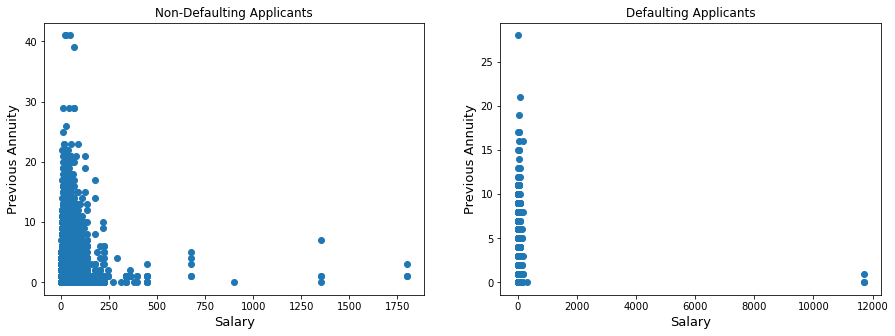

In [95]:
# AMT_INCOME_TOTAL vs PREV_AMT_ANNUITY
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.scatter((nd['AMT_INCOME_TOTAL']), nd['PREV_AMT_ANNUITY'])
plt.title('Non-Defaulting Applicants')
plt.xlabel("Salary", fontdict = {'fontsize' : 13, 'fontweight': 10})
plt.ylabel("Previous Annuity", fontdict = {'fontsize' : 13, 'fontweight': 10})

plt.subplot(1,2,2)
plt.scatter((yd['AMT_INCOME_TOTAL']), yd['PREV_AMT_ANNUITY'])
plt.title('Defaulting Applicants')
plt.xlabel("Salary", fontdict = {'fontsize' : 13, 'fontweight': 10})
plt.ylabel("Previous Annuity", fontdict = {'fontsize' : 13, 'fontweight': 10})

plt.show()

# No clear patterns seen

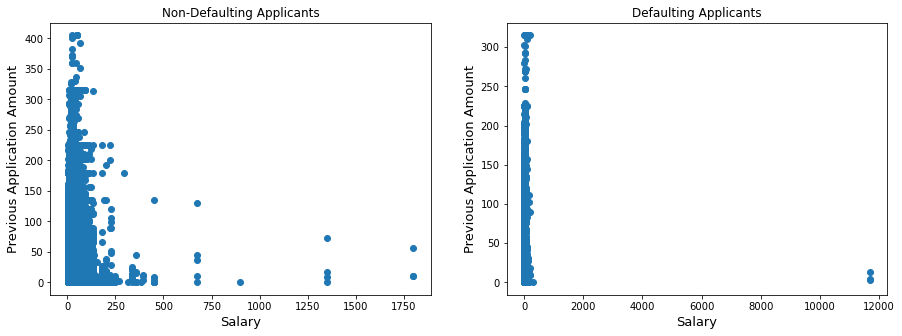

In [96]:
# AMT_INCOME_TOTAL vs AMT_APPLICATION
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.scatter((nd['AMT_INCOME_TOTAL']), nd['AMT_APPLICATION'])
plt.title('Non-Defaulting Applicants')
plt.xlabel("Salary", fontdict = {'fontsize' : 13, 'fontweight': 10})
plt.ylabel("Previous Application Amount", fontdict = {'fontsize' : 13, 'fontweight': 10})

plt.subplot(1,2,2)
plt.scatter((yd['AMT_INCOME_TOTAL']), yd['AMT_APPLICATION'])
plt.title('Defaulting Applicants')
plt.xlabel("Salary", fontdict = {'fontsize' : 13, 'fontweight': 10})
plt.ylabel("Previous Application Amount", fontdict = {'fontsize' : 13, 'fontweight': 10})

plt.show()

# No patterns seen

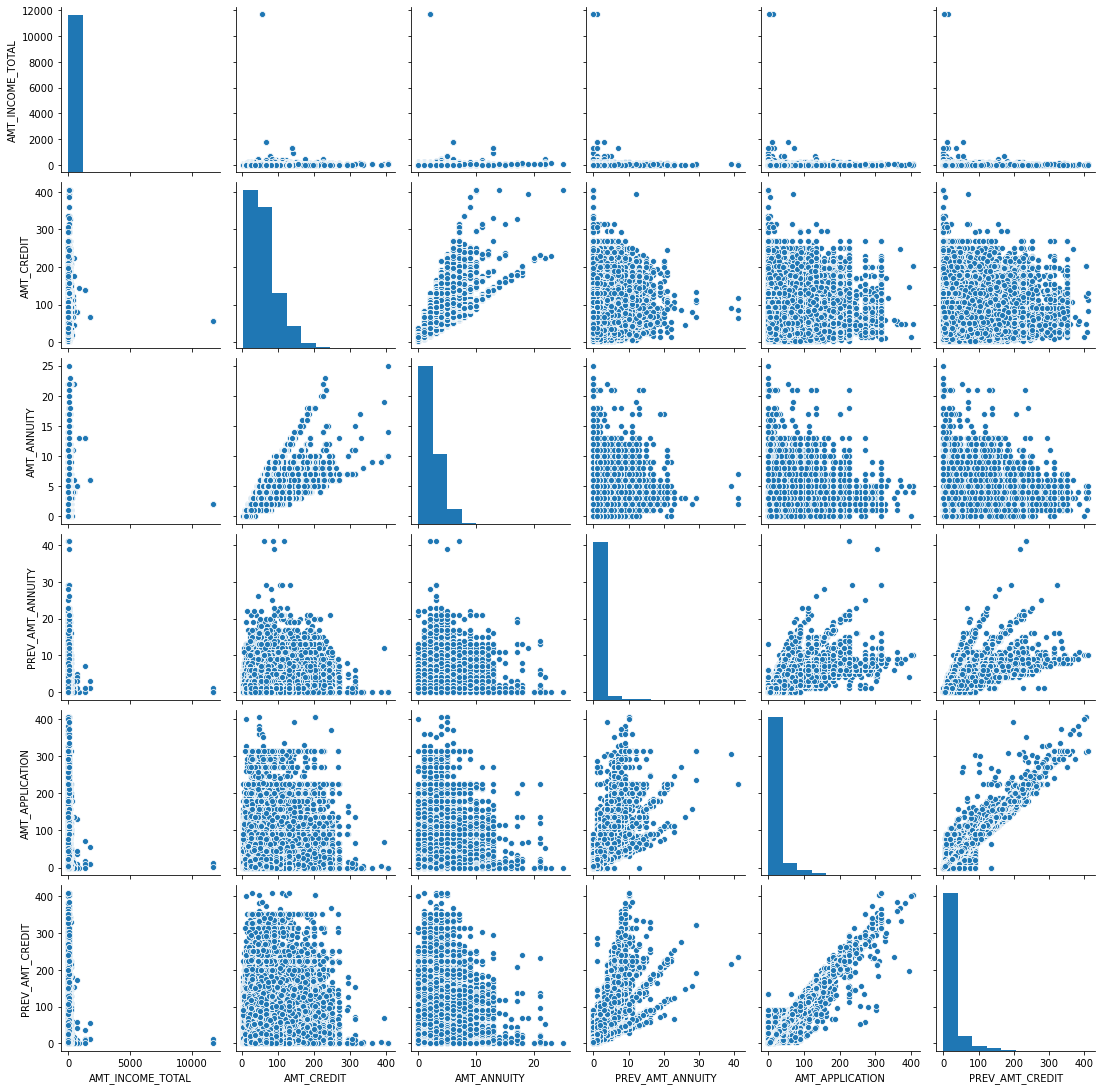

In [97]:
sns.pairplot(data=inp_0,vars=['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'PREV_AMT_ANNUITY','AMT_APPLICATION', 'PREV_AMT_CREDIT'])
plt.show()

**`Inferences below.`**

- Inference: As observed in the  Pair plot, there is a  correlation between PREV_AMT_CREDIT, PREV_AMT_ANNUITY & AMT_APPLICATION.
    

In [98]:
inp_0.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,CNT_FAM_MEMBERS,ORGANIZATION_TYPE,PREV_NAME_CONTRACT_TYPE,PREV_AMT_ANNUITY,AMT_APPLICATION,PREV_AMT_CREDIT,NAME_CONTRACT_STATUS,AGE_GROUP
0,100002,1,Cash loans,M,N,Y,20.0,40.0,2.0,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,1.0,Business Entity Type 3,Consumer loans,0.0,17.0,17.0,Approved,<30
1,100003,0,Cash loans,F,N,N,27.0,129.0,3.0,State servant,Higher education,Married,House / apartment,Core staff,2.0,School,Cash loans,9.0,90.0,103.0,Approved,40-50
2,100003,0,Cash loans,F,N,N,27.0,129.0,3.0,State servant,Higher education,Married,House / apartment,Core staff,2.0,School,Consumer loans,6.0,33.0,34.0,Approved,40-50
3,100004,0,Revolving loans,M,Y,Y,6.0,13.0,0.0,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,1.0,Government,Consumer loans,0.0,2.0,2.0,Approved,50-60
4,100006,0,Cash loans,F,N,Y,13.0,31.0,2.0,Working,Secondary / secondary special,Civil marriage,House / apartment,Laborers,2.0,Business Entity Type 3,Cash loans,2.0,67.0,67.0,Approved,50-60


### Bi-variate : Categorical - Continuous

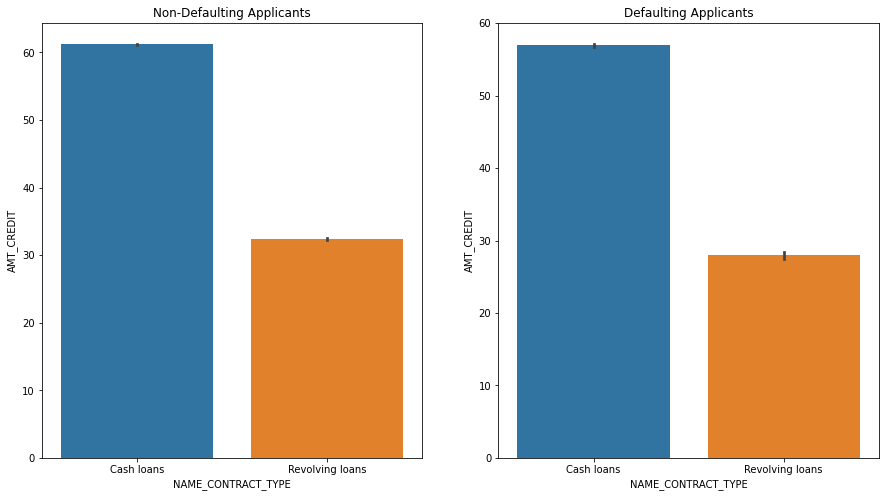

In [99]:
# NAME_CONTRACT_TYPE vs AMT_CREDIT
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
sns.barplot(x = 'NAME_CONTRACT_TYPE', y ='AMT_CREDIT', data=nd)
plt.title('Non-Defaulting Applicants')

plt.subplot(1,2,2)
sns.barplot(x = 'NAME_CONTRACT_TYPE', y ='AMT_CREDIT', data=yd)
plt.title('Defaulting Applicants')

plt.show()

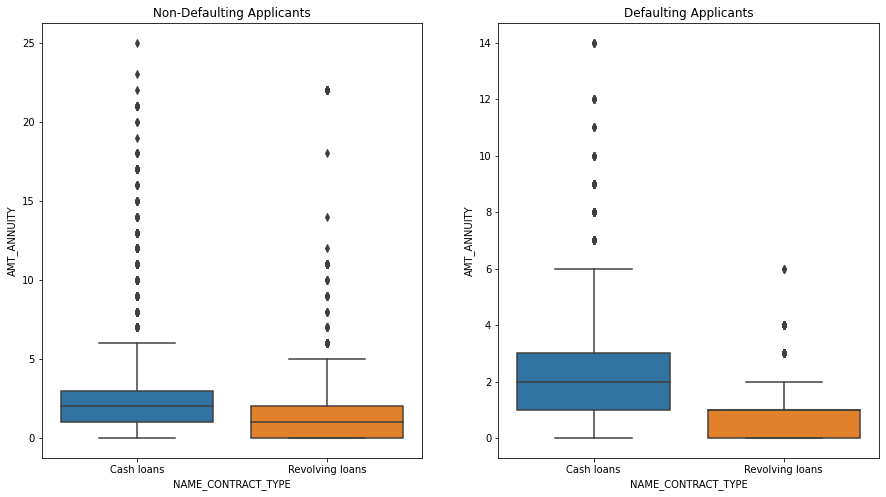

In [100]:
# NAME_CONTRACT_TYPE vs AMT_ANNUITY
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
sns.boxplot(x = 'NAME_CONTRACT_TYPE', y ='AMT_ANNUITY', data=nd)
plt.title('Non-Defaulting Applicants')

plt.subplot(1,2,2)
sns.boxplot(x = 'NAME_CONTRACT_TYPE', y ='AMT_ANNUITY', data=yd)
plt.title('Defaulting Applicants')

plt.show()

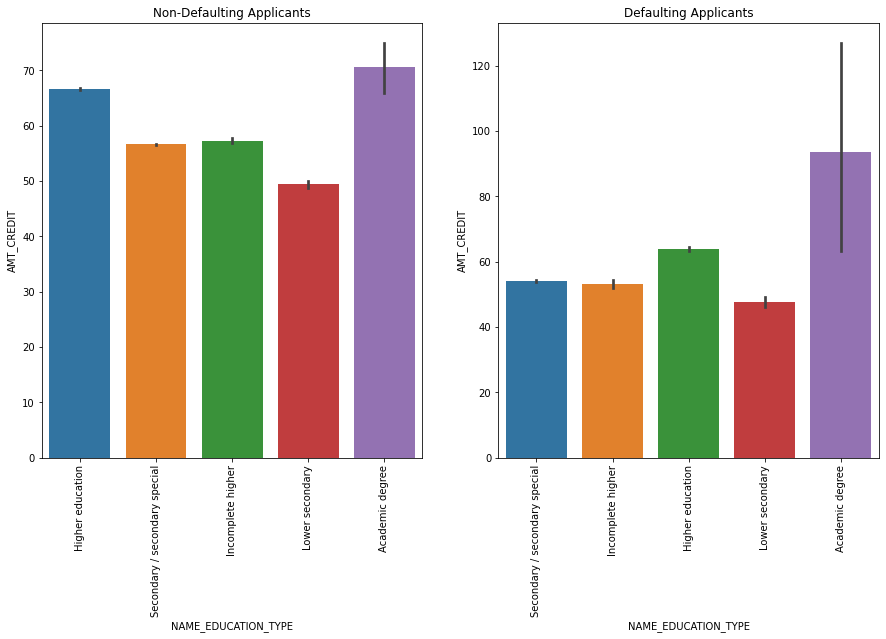

In [101]:
# NAME_EDUCATION_TYPE vs AMT_CREDIT - barh
plt.figure(figsize=(15,8))

plt.subplot(1,2,1)
sns.barplot(data=nd, x="NAME_EDUCATION_TYPE", y="AMT_CREDIT")
plt.title('Non-Defaulting Applicants')
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.barplot(data=yd, x="NAME_EDUCATION_TYPE", y="AMT_CREDIT")
plt.title('Defaulting Applicants')
plt.xticks(rotation=90)

plt.show()

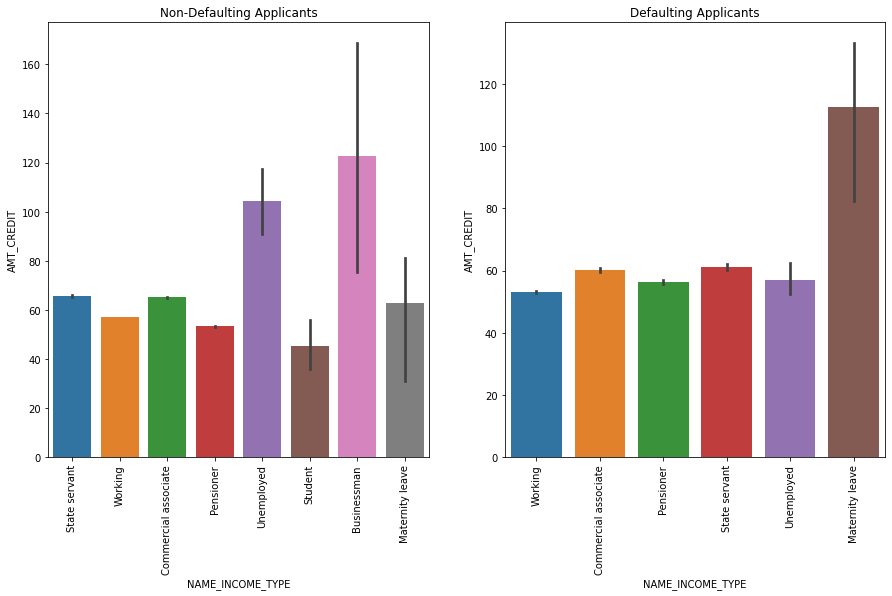

In [102]:
#NAME_INCOME_TYPE vs AMT_CREDIT
plt.figure(figsize=(15,8))

plt.subplot(1,2,1)
sns.barplot(data=nd, x="NAME_INCOME_TYPE", y="AMT_CREDIT")
plt.title('Non-Defaulting Applicants')
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.barplot(data=yd, x="NAME_INCOME_TYPE", y="AMT_CREDIT")
plt.title('Defaulting Applicants')
plt.xticks(rotation=90)

plt.show()

**`Inferences below.`**

- Inference 1: Women applying for loan during their maternity leave are more likely to default.
- Inference 2: Applicants with income type Business are the highest seeker of loan who pay on time, followed by unemployed people.
- Inference 3: Businessmen and Students are not likely to default.

In [103]:
nd.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,CNT_FAM_MEMBERS,ORGANIZATION_TYPE,PREV_NAME_CONTRACT_TYPE,PREV_AMT_ANNUITY,AMT_APPLICATION,PREV_AMT_CREDIT,NAME_CONTRACT_STATUS,AGE_GROUP
1,100003,0,Cash loans,F,N,N,27.0,129.0,3.0,State servant,Higher education,Married,House / apartment,Core staff,2.0,School,Cash loans,9.0,90.0,103.0,Approved,40-50
2,100003,0,Cash loans,F,N,N,27.0,129.0,3.0,State servant,Higher education,Married,House / apartment,Core staff,2.0,School,Consumer loans,6.0,33.0,34.0,Approved,40-50
3,100004,0,Revolving loans,M,Y,Y,6.0,13.0,0.0,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,1.0,Government,Consumer loans,0.0,2.0,2.0,Approved,50-60
4,100006,0,Cash loans,F,N,Y,13.0,31.0,2.0,Working,Secondary / secondary special,Civil marriage,House / apartment,Laborers,2.0,Business Entity Type 3,Cash loans,2.0,67.0,67.0,Approved,50-60
5,100006,0,Cash loans,F,N,Y,13.0,31.0,2.0,Working,Secondary / secondary special,Civil marriage,House / apartment,Laborers,2.0,Business Entity Type 3,Revolving loans,1.0,0.0,0.0,Canceled,50-60


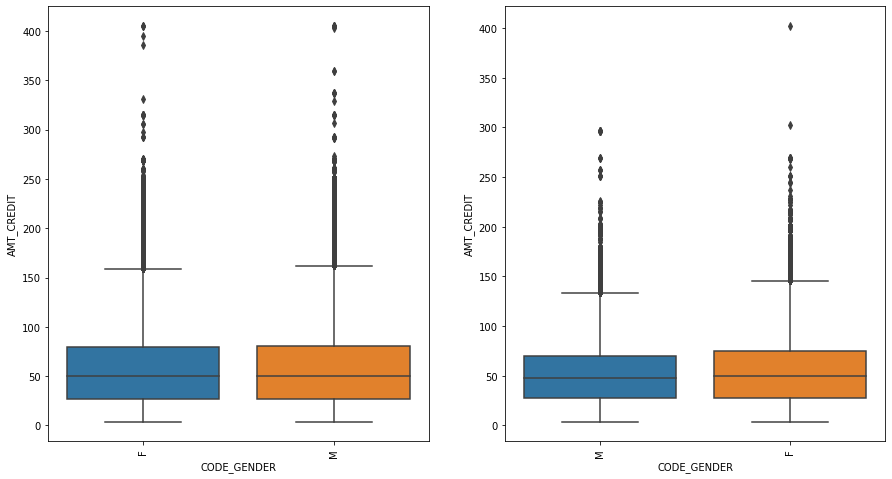

In [104]:
# CODE_GENDER vs AMT_CREDIT
plt.figure(figsize=(15,8))

plt.subplot(1,2,1)
sns.boxplot(x = 'CODE_GENDER', y ='AMT_CREDIT', data=nd)
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.boxplot(x = 'CODE_GENDER', y ='AMT_CREDIT', data=yd)
plt.xticks(rotation=90)

plt.show()

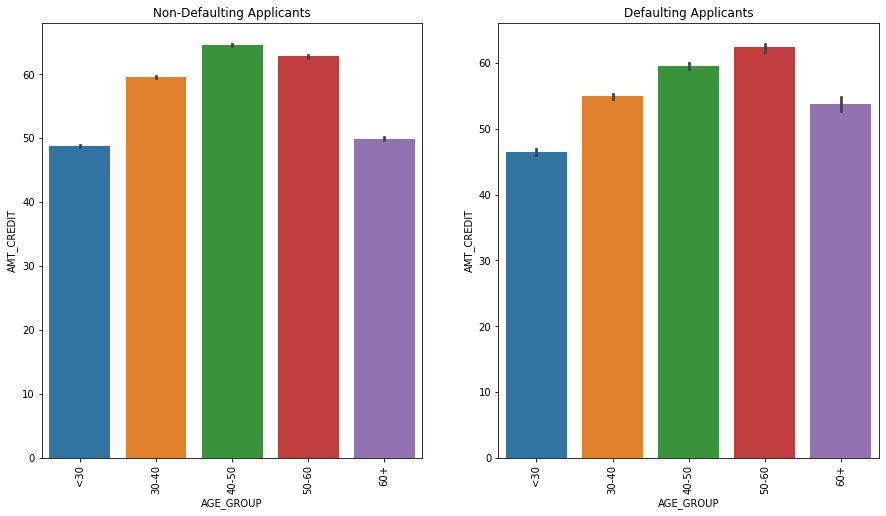

In [105]:
# AGE_GROUP vs AMT_CREDIT
plt.figure(figsize=(15,8))

plt.subplot(1,2,1)
sns.barplot(x = 'AGE_GROUP', y ='AMT_CREDIT', data=nd)
plt.title('Non-Defaulting Applicants')
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.barplot(x = 'AGE_GROUP', y ='AMT_CREDIT', data=yd)
plt.title('Defaulting Applicants')
plt.xticks(rotation=90)


plt.show()

**`Inferences Below:`**
- Inference 1: Amount of credit among the defaulters is most in the age-group 50-60 and least in the age group within 30.
- Inference 2: Amount of credit among the non-defaulters is most in the age group 40-50.

### Multivariate Continuous - Continuous

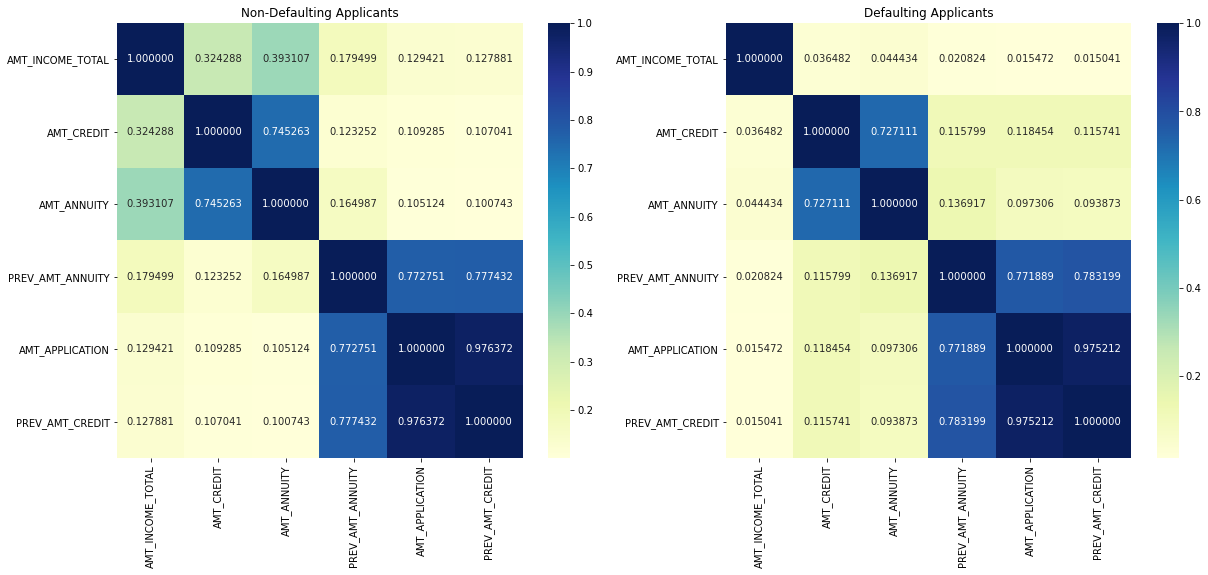

In [106]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
sns.heatmap(nd[['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY', 'PREV_AMT_ANNUITY', 'AMT_APPLICATION', 'PREV_AMT_CREDIT']].corr(),annot=True, fmt='f', cmap="YlGnBu")
plt.title('Non-Defaulting Applicants')

plt.subplot(1,2,2)
sns.heatmap(yd[['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY', 'PREV_AMT_ANNUITY', 'AMT_APPLICATION', 'PREV_AMT_CREDIT']].corr(),annot=True,fmt='f', cmap="YlGnBu")
plt.title('Defaulting Applicants')

plt.show()

**`Inferences below`**
- Inference 1: Annuity amount is very low for the defaulters when seen against their Total Income 
- Inference 2: Amount credited to the defaulters are considerably less with respect to Total Income when compared from Non-Defaulter.
- Inference 3: Previous Loan Annuity amount is also very low for the defaulters when seen against their Total Income 
- Inference 4: When, comparing Annuity with Amount Credited, there is not much difference between Defaulters and Non-Defaulters.
- Inference 5: The correlation of Credit asked from the applicant in previous application and the amount credited for the previous application is higher regardless of the applicant being defaulter or non-defaulter


### Bi-variate Categorical - Categorical

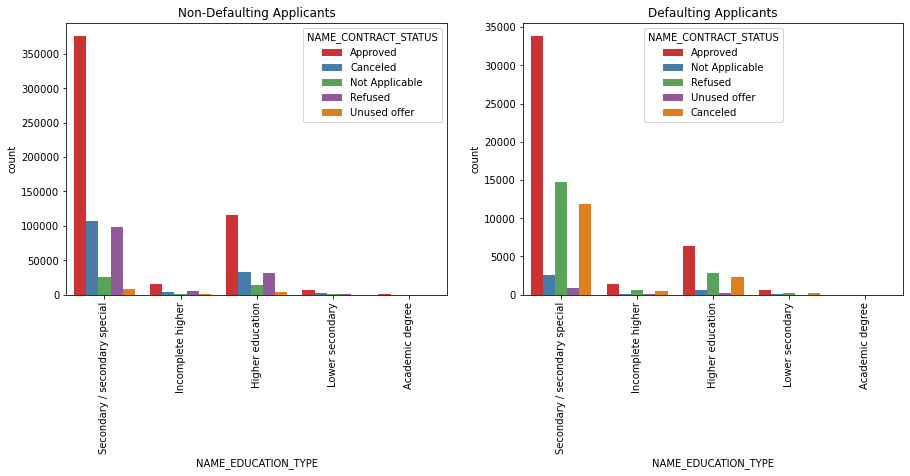

In [107]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(x = 'NAME_EDUCATION_TYPE', hue ='NAME_CONTRACT_STATUS', data=nd, palette = 'Set1', order=['Secondary / secondary special', 'Incomplete higher', 'Higher education', 'Lower secondary', 'Academic degree'])
plt.title('Non-Defaulting Applicants')
plt.xticks(rotation=90)
    
plt.subplot(1,2,2)
sns.countplot(x = 'NAME_EDUCATION_TYPE', hue ='NAME_CONTRACT_STATUS' , data=yd, palette = 'Set1', order=['Secondary / secondary special', 'Incomplete higher', 'Higher education', 'Lower secondary', 'Academic degree'])
plt.title('Defaulting Applicants')
plt.xticks(rotation=90)

plt.show()

**`Inferences below`**
- Inference: Default applicants  with Highest education as 'Secondary/secondary special' have had maximum Approved loans,as well as  highest Refused and Cancelled Loans in comparsion to Applicants who are less educated.
    
    


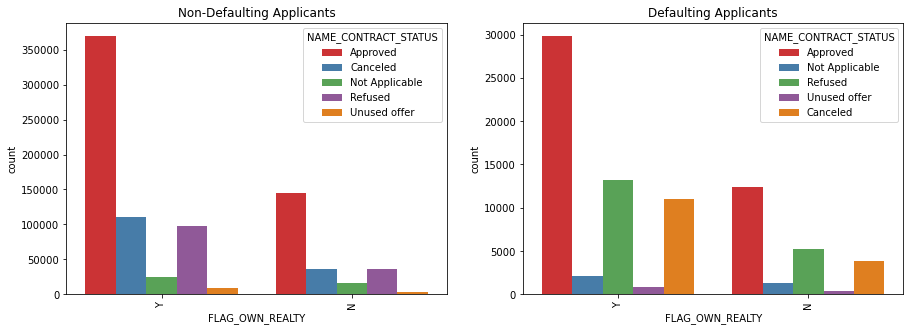

In [108]:
# FLAG_OWN_REALTY vs NAME_CONTRACT_STATUS
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(x = 'FLAG_OWN_REALTY', hue ='NAME_CONTRACT_STATUS', data=nd, palette = 'Set1', order=['Y', 'N'])
plt.title('Non-Defaulting Applicants')
plt.xticks(rotation=90)
    
plt.subplot(1,2,2)
sns.countplot(x = 'FLAG_OWN_REALTY', hue ='NAME_CONTRACT_STATUS' , data=yd, palette = 'Set1', order=['Y', 'N'])
plt.title('Defaulting Applicants')
plt.xticks(rotation=90)

plt.show()

In [109]:
nd.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,CNT_FAM_MEMBERS,ORGANIZATION_TYPE,PREV_NAME_CONTRACT_TYPE,PREV_AMT_ANNUITY,AMT_APPLICATION,PREV_AMT_CREDIT,NAME_CONTRACT_STATUS,AGE_GROUP
1,100003,0,Cash loans,F,N,N,27.0,129.0,3.0,State servant,Higher education,Married,House / apartment,Core staff,2.0,School,Cash loans,9.0,90.0,103.0,Approved,40-50
2,100003,0,Cash loans,F,N,N,27.0,129.0,3.0,State servant,Higher education,Married,House / apartment,Core staff,2.0,School,Consumer loans,6.0,33.0,34.0,Approved,40-50
3,100004,0,Revolving loans,M,Y,Y,6.0,13.0,0.0,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,1.0,Government,Consumer loans,0.0,2.0,2.0,Approved,50-60
4,100006,0,Cash loans,F,N,Y,13.0,31.0,2.0,Working,Secondary / secondary special,Civil marriage,House / apartment,Laborers,2.0,Business Entity Type 3,Cash loans,2.0,67.0,67.0,Approved,50-60
5,100006,0,Cash loans,F,N,Y,13.0,31.0,2.0,Working,Secondary / secondary special,Civil marriage,House / apartment,Laborers,2.0,Business Entity Type 3,Revolving loans,1.0,0.0,0.0,Canceled,50-60


### Univariate - Continuous

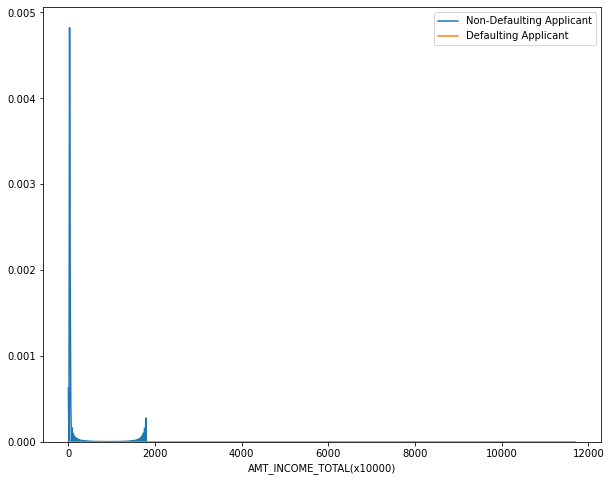

In [110]:
plt.figure(figsize=(10,8))

sns.distplot(nd['AMT_INCOME_TOTAL'], hist = False, label='Non-Defaulting Applicant')
plt.xlabel("AMT_INCOME_TOTAL(x10000)")


sns.distplot(yd['AMT_INCOME_TOTAL'], hist = False, label='Defaulting Applicant')
plt.xlabel("AMT_INCOME_TOTAL(x10000)")

plt.show()

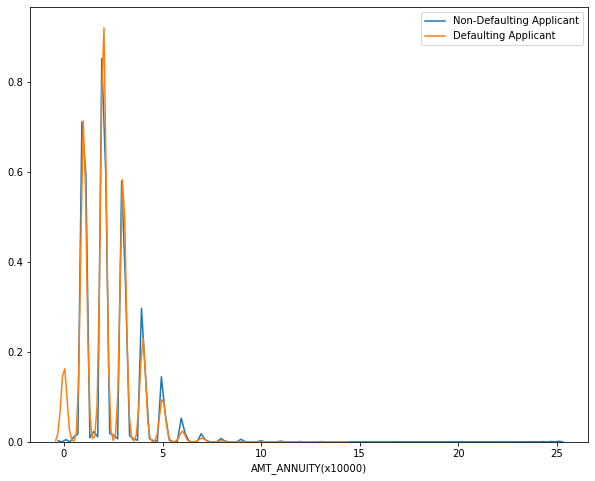

In [111]:
plt.figure(figsize=(10,8))

sns.distplot(nd['AMT_ANNUITY'], hist = False, label='Non-Defaulting Applicant')
plt.xlabel("AMT_ANNUITY(x10000)")


sns.distplot(yd['AMT_ANNUITY'], hist = False, label='Defaulting Applicant')
plt.xlabel("AMT_ANNUITY(x10000)")

plt.show()

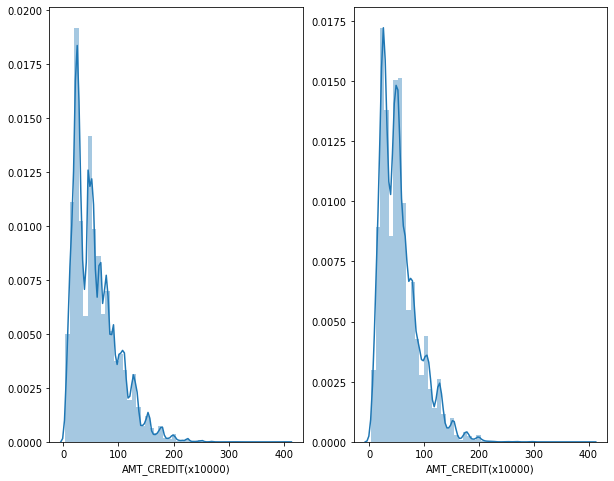

In [112]:
plt.figure(figsize=(10,8))

plt.subplot(1,2,1)
sns.distplot(nd['AMT_CREDIT'], label='Non-Defaulting Applicant')
plt.xlabel("AMT_CREDIT(x10000)")

plt.subplot(1,2,2)
sns.distplot(yd['AMT_CREDIT'], label='Defaulting Applicant')
plt.xlabel("AMT_CREDIT(x10000)")

plt.show()

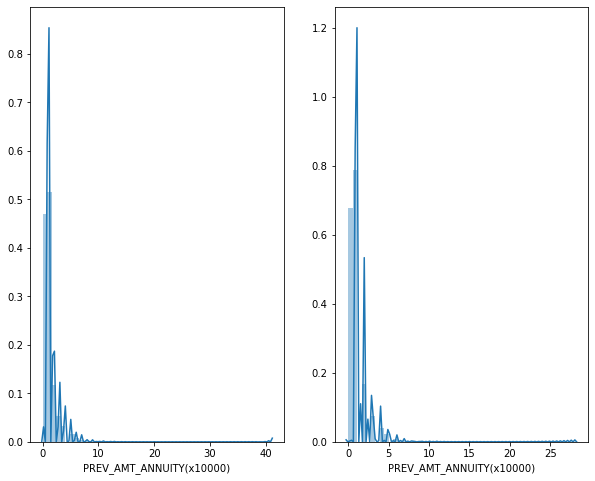

In [113]:
plt.figure(figsize=(10,8))

plt.subplot(1,2,1)
sns.distplot(nd['PREV_AMT_ANNUITY'], label='Non-Defaulting Applicant')
plt.xlabel("PREV_AMT_ANNUITY(x10000)")

plt.subplot(1,2,2)
sns.distplot(yd['PREV_AMT_ANNUITY'], label='Defaulting Applicant')
plt.xlabel("PREV_AMT_ANNUITY(x10000)")

plt.show()

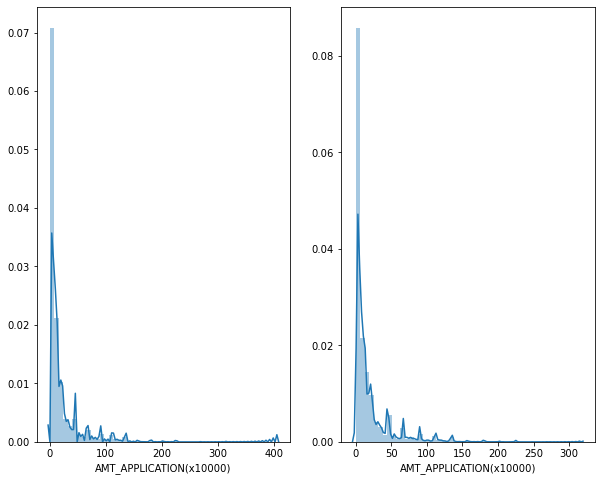

In [114]:
plt.figure(figsize=(10,8))

plt.subplot(1,2,1)
sns.distplot(nd['AMT_APPLICATION'], label='Non-Defaulting Applicant')
plt.xlabel("AMT_APPLICATION(x10000)")

plt.subplot(1,2,2)
sns.distplot(yd['AMT_APPLICATION'], label='Defaulting Applicant')
plt.xlabel("AMT_APPLICATION(x10000)")
plt.show()

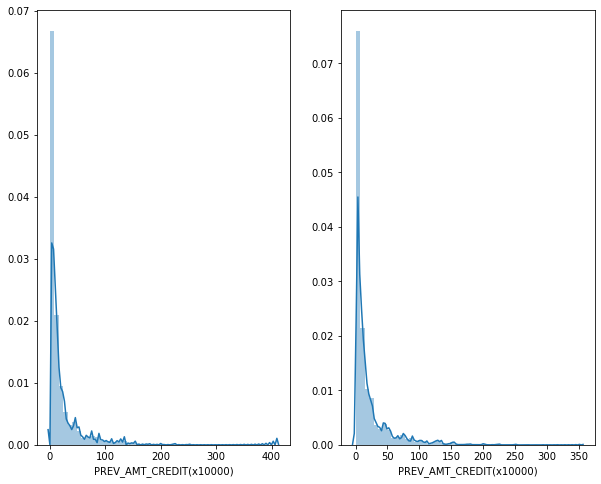

In [115]:
plt.figure(figsize=(10,8))

plt.subplot(1,2,1)
sns.distplot(nd['PREV_AMT_CREDIT'], label='Non-Defaulting Applicant')
plt.xlabel("PREV_AMT_CREDIT(x10000)")

plt.subplot(1,2,2)
sns.distplot(yd['PREV_AMT_CREDIT'], label='Defaulting Applicant')
plt.xlabel("PREV_AMT_CREDIT(x10000)")


plt.show()